In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_datareader.data as web
import datetime

In [81]:
import qeds
qeds.themes.mpl_style();
colors=plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors.remove('#fec630')
sns.set_style('whitegrid')

In [3]:
lfpr = pd.read_csv('./lfpr.csv',skiprows=4)
id_cols = lfpr.columns.values[:4]
value_cols = lfpr.columns.values[4:]
lfpr=lfpr.melt(id_vars=id_cols,value_vars=value_cols,var_name='year',value_name='LFPR')
lfpr.dropna(inplace=True)
lfpr['year'] = lfpr.year.astype(int)



In [4]:
ur = pd.read_csv('./ur.csv',skiprows=4)
id_cols = ur.columns.values[:4]
value_cols = ur.columns.values[4:]
ur=ur.melt(id_vars=id_cols,value_vars=value_cols,var_name='year',value_name='UR')
ur.dropna(inplace=True)
ur['year'] = ur.year.astype(int)


In [5]:
epop = pd.read_csv('./epop.csv',skiprows=4)
id_cols = epop.columns.values[:4]
value_cols = epop.columns.values[4:]
epop=epop.melt(id_vars=id_cols,value_vars=value_cols,var_name='year',value_name='E/pop')
epop.dropna(inplace=True)
epop['year'] = epop.year.astype(int)


In [6]:
df_legend = pd.read_excel('./mpd2018.xlsx',sheet_name='Legend')
df_legend.rename(columns={'Maddison Project Database (MPD) 2018':'Variable name','Unnamed: 1':'Definition'},
                 inplace=True)
df_legend.dropna(inplace=True)
df_legend = dict(zip(df_legend['Variable name'],df_legend['Definition']))

In [7]:
df_legend

{'Full data': 'Data in  single table',
 'countrycode': '3-letter ISO country code',
 'country': 'Country name',
 'year': 'Year',
 'cgdppc': 'Real GDP per capita in 2011US$, multiple benchmarks (suitable for cross-country income comparisons)',
 'rgdpnapc': 'Real GDP per capita in 2011US$, 2011 benchmark (suitable for cross-country growth comparisons)',
 'pop': 'Population, mid-year (thousands)',
 'i_cig': '0/1/2: observation is extrapolated (0), benchmark (1), or interpolated (2)',
 'i_bm': 'For benchmark observations: 1: ICP PPP estimates, 2: Historical income benchmarks, 3: Real wages and urbanization, 4: Multiple of subsistence, 5: Braithwaite (1968) PPPs',
 'Partial countries': 'Data for selected sub-national units with long time series'}

In [8]:
df = pd.read_excel('./mpd2018.xlsx',sheet_name='Full data')

In [9]:
df.set_index(['countrycode','year'],inplace=True)

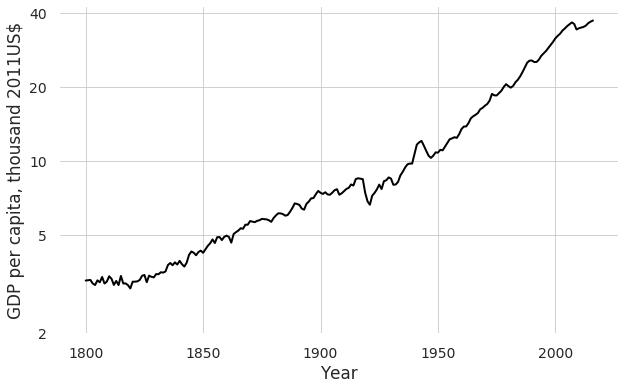

In [10]:
fig,ax = plt.subplots(figsize=(10,6))
ax.plot(df.xs(['GBR']).loc[1800:]['rgdpnapc']/1000,color='k',linewidth=2)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita, thousand 2011US$')
ax.set_yscale('log')
ticks = (2,5,10,20,40)
ax.set_yticks(ticks)
ax.set_yticklabels(ticks)
plt.savefig('./gdp-cap-uk-log.svg',bbox_inches='tight')

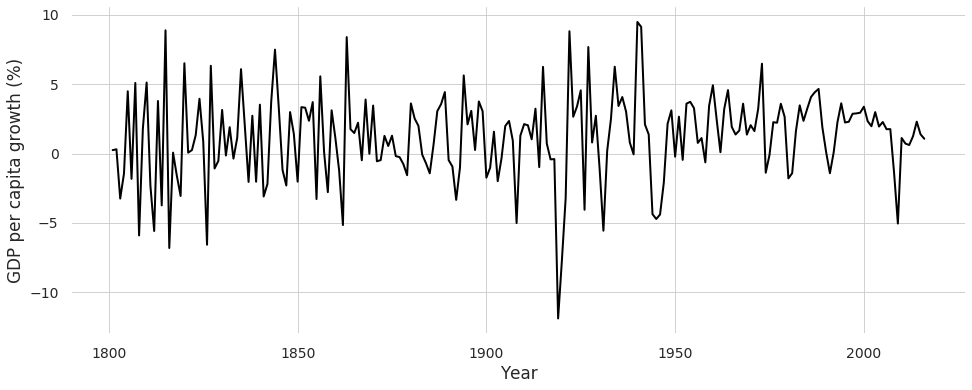

In [11]:
fig,ax = plt.subplots(figsize=(16,6))
ax.plot(df.xs(['GBR']).loc[1800:]['rgdpnapc'].pct_change()*100,color='k',linewidth=2)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita growth (%)')
plt.savefig('./gdp-cap-growth-uk.svg',bbox_inches='tight')

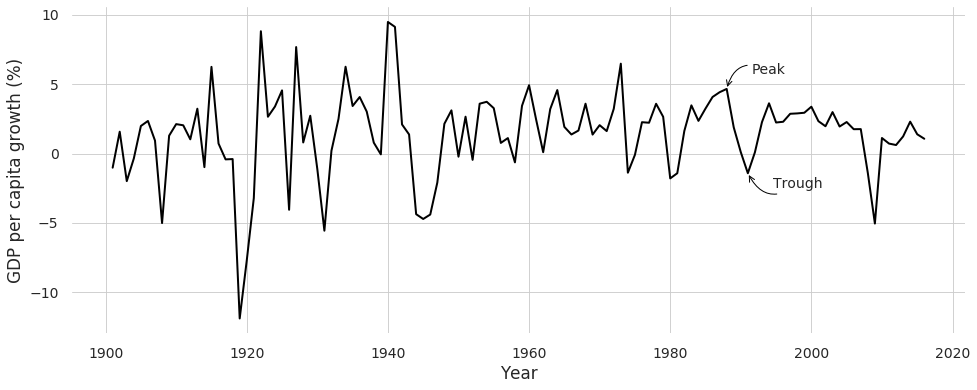

In [12]:
fig,ax = plt.subplots(figsize=(16,6))
ax.plot(df.xs(['GBR']).loc[1900:]['rgdpnapc'].pct_change()*100,color='k',linewidth=2)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('GDP per capita growth (%)')

ax.annotate(
'Peak', xy=(1988,4.655223), xycoords="data",
xytext=(25, 15), textcoords="offset points",
arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.annotate(
'Trough', xy=(1991,-1.421395), xycoords="data",
xytext=(25, -15), textcoords="offset points",
arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=-0.6"))
plt.savefig('./gdp-cap-growth-uk-focus-label.svg',bbox_inches='tight')

In [13]:
df.reset_index(inplace=True)

In [14]:
df.sort_values(['rgdpnapc','year'],inplace=True)

In [15]:
df['GDP per capita growth rate']=df.groupby('countrycode').rgdpnapc.pct_change()

In [16]:
df['GDP per capita growth rate'] = df['GDP per capita growth rate']*100 

In [17]:
ur=ur.rename(columns={'Country Code':'countrycode'}).set_index(['countrycode','year'])

In [18]:
ur['Change in UR']=ur.groupby('countrycode').UR.pct_change()

In [19]:
ur['Change in UR'] = ur['Change in UR']*100

In [22]:
df.set_index(['countrycode','year'],inplace=True)

In [23]:
ur = ur.join(df)

In [24]:
ur.reset_index(inplace=True)

In [25]:
countries_pick = ['NOR','ESP','CHN','IND','FRA','GBR']

In [26]:
df2 = ur[ur.countrycode.isin(countries_pick)]

In [27]:
df2.head()

,countrycode,year,Country Name,Indicator Name,Indicator Code,UR,Change in UR,country,cgdppc,rgdpnapc,pop,i_cig,i_bm,GDP per capita growth rate
33,CHN,1991,China,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.400,NaN,China,2550.0,2460.0,1149979.0,Interpolated,NaN,1.276245
60,ESP,1991,Spain,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,15.929,NaN,Spain,17846.0,23425.0,39451.0,Interpolated,NaN,1.118018
67,FRA,1991,France,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,9.134,NaN,France,24533.0,29158.0,58514.0,Interpolated,NaN,0.154570
69,GBR,1991,United Kingdom,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,8.552,NaN,United Kingdom,23696.0,25314.0,57671.0,Interpolated,NaN,0.536161
93,IND,1991,India,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,2.361,NaN,India,1297.0,1736.0,854581.0,Interpolated,NaN,2.721893


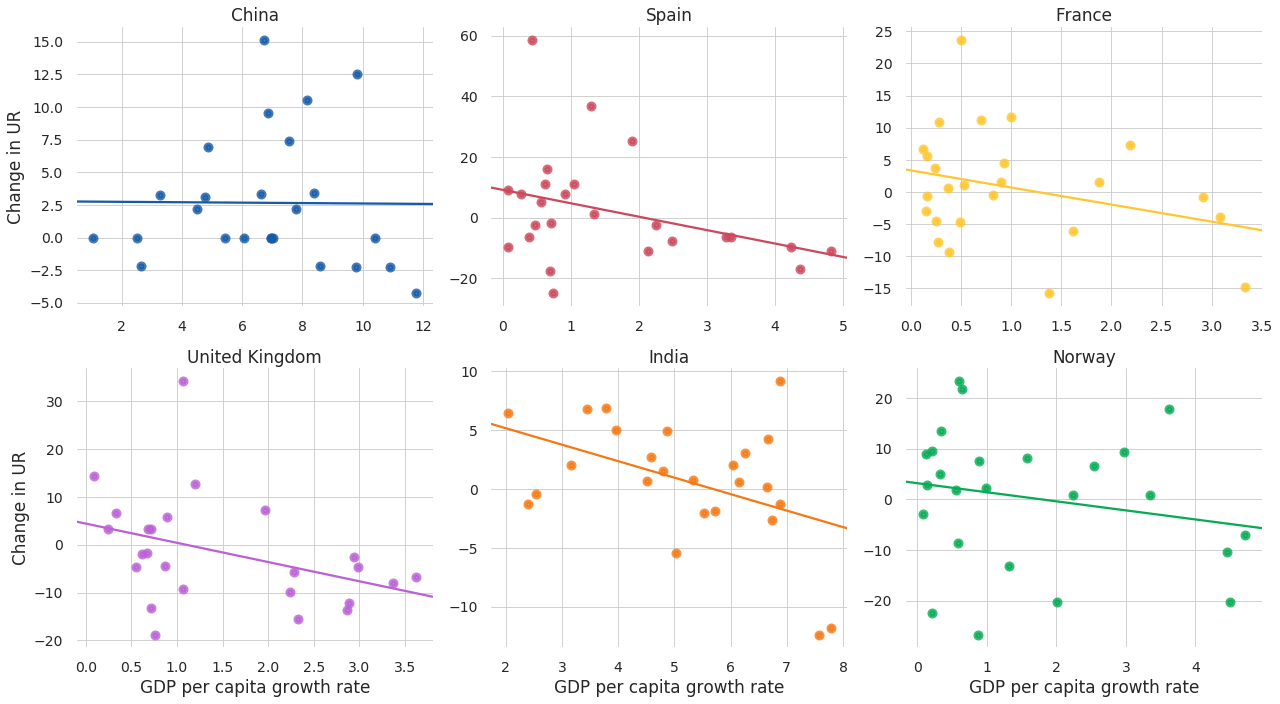

In [28]:
colors=plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors = [color for color in colors if color != '#fec630']
#pal = dict(zip(countries_pick,colors))
g=sns.lmplot(y='Change in UR',x='GDP per capita growth rate',hue='Country Name',ci=None,col='Country Name',
             col_wrap=3,scatter_kws={'linewidth':4},sharex=False,sharey=False,
           aspect=1.2,data=df2)
#plt.xlim(xmin=1999,xmax=2020)
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False)
# locator = matplotlib.ticker.MultipleLocator(4)
# plt.gca().xaxis.set_major_locator(locator)
# formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
# plt.gca().xaxis.set_major_formatter(formatter)
g.set_titles('{col_name}')
plt.savefig('./okun.svg',bbox_inches='tight')

In [29]:
data_legend = {'NAEXKP02GBA657S':'UK, C',
 'NAEXKP04GBA657S':'UK, I',
 'NAEXKP01GBA657S':'UK, GDP',
 'NAEXKP02DEQ661S':'GE, C',
 'NAEXKP04DEA657S':'GE, I',
'NAEXKP01DEA657S':'GE, GDP',
 'NAEXKP02ITA657S':'IT, C',
 'NAEXKP04ITA657S':'IT, I',
 'NAEXKP01ITA657S':'IT, GDP',
 'NAEXKP02FRA657S':'FR, C',
 'NAEXKP04FRA657S':'FR, I',
 'NAEXKP01FRA657S':'FR, GDP',
 'NAEXKP02USA657S':'US, C',
 'NAEXKP04USA657S':'US, I',
 'NAEXKP01USA657S':'US, GDP',
 'NAEXKP02GRA657S':'GR, C',
 'NAEXKP04GRA657S':'GR, I',
 'NAEXKP01GRA657S':'GR, GDP',
}

In [36]:
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2019, 12, 31)

df = web.DataReader(list(data_legend.keys()), 'fred',start,end)


In [42]:
df.rename(columns=data_legend,inplace=True)

In [43]:
df

,"UK, C","UK, I","UK, GDP","GE, C","GE, I","GE, GDP","IT, C","IT, I","IT, GDP","FR, C","FR, I","FR, GDP","US, C","US, I","US, GDP","GR, C","GR, I","GR, GDP"
DATE,,,,,,,,,,,,,,,,,,
1960-01-01,3.871367,16.080092,6.349510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.743858,-0.224415,2.573445,NaN,NaN,NaN
1961-01-01,2.307326,8.093759,2.701314,NaN,NaN,NaN,NaN,NaN,NaN,5.945189,10.869319,5.506346,2.051029,2.516951,2.563704,NaN,NaN,NaN
1962-01-01,2.529254,0.925907,1.098696,NaN,NaN,NaN,NaN,NaN,NaN,7.062402,8.489587,6.672032,4.944277,7.712820,6.127079,NaN,NaN,NaN
1963-01-01,5.951466,2.346339,4.859545,NaN,NaN,NaN,NaN,NaN,NaN,6.302863,8.858737,5.531062,4.126522,5.442508,4.355044,NaN,NaN,NaN
1964-01-01,3.385710,16.194533,5.594811,NaN,NaN,NaN,NaN,NaN,NaN,5.494792,10.471121,6.523361,5.951313,7.508093,5.761262,NaN,NaN,NaN
1965-01-01,1.970241,4.686153,2.130333,NaN,NaN,NaN,NaN,NaN,NaN,4.225413,6.992574,4.773308,6.343635,7.896453,6.497755,NaN,NaN,NaN
1966-01-01,2.318764,-0.214587,1.567450,NaN,NaN,NaN,NaN,NaN,NaN,4.915555,7.254436,5.215737,5.670076,6.447298,6.596014,NaN,NaN,NaN
1967-01-01,3.060842,8.727797,2.775738,NaN,NaN,NaN,NaN,NaN,NaN,4.996957,6.029292,4.690050,2.989488,-0.106094,2.742505,NaN,NaN,NaN
1968-01-01,3.477036,10.968692,5.472693,NaN,NaN,NaN,NaN,NaN,NaN,3.624603,5.529072,4.258859,5.762337,4.494276,4.915604,NaN,NaN,NaN


In [46]:
df.reset_index(inplace=True)

In [57]:
df['Year']=df['DATE'].map(lambda x: x.year)
df['Month'] = df['DATE'].map(lambda x: x.month)

In [60]:
df2 =df[df.Month==1]

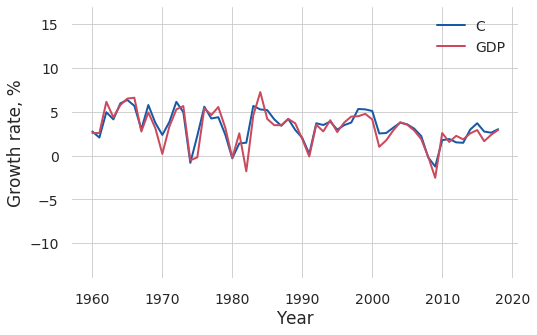

In [87]:
country_ = 'US'
colors_ = dict(zip(['C','GDP','I'],colors))
fig,ax=plt.subplots(figsize=(8,5))
for var in ['C','GDP']:#,'I']:
    var_ = f'{country_}, {var}'
    ax.plot(df2['Year'],df2[var_],color=colors_[var],linewidth=2,label=var)
ax.set_xlabel('Year')
ax.set_ylabel('Growth rate, %')
ax.set_ylim(ymin=-14,ymax=17)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(loc='best',frameon=False)
plt.savefig(f'./volatility-components_{country_}_C_GDP.svg',bbox_inches='tight')

In [88]:
df3 = pd.read_excel('mexico-sa.xlsx')

In [91]:
df3.head()

,Year,"Mexico, C","Mexico, I","Mexico, GDP","SA, C","SA, I","SA, GDP"
0,1961,4.442743,0.915284,5.000000,1.108675,0.093908,3.845404
1,1962,-28.375414,5.556074,4.664415,5.638195,-2.323409,6.177271
2,1963,7.139730,11.366908,8.106887,7.218990,17.854118,7.373564
3,1964,11.161170,20.255104,11.905481,9.716800,19.665372,7.939841
4,1965,42.497686,54.422335,7.100000,12.397542,12.022472,8.896031


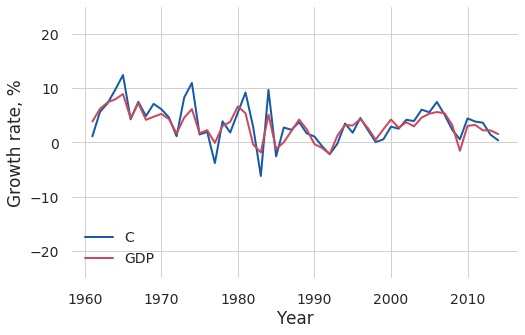

In [108]:
country_ = 'SA'
colors_ = dict(zip(['C','GDP','I'],colors))
fig,ax=plt.subplots(figsize=(8,5))
for var in ['C','GDP']:#,'I']:
    var_ = f'{country_}, {var}'
    ax.plot(df3['Year'],df3[var_],color=colors_[var],linewidth=2,label=var)
ax.set_xlabel('Year')
ax.set_ylabel('Growth rate, %')
ax.set_ylim(ymin=-25,ymax=25)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.legend(loc='lower left',frameon=False)
plt.savefig(f'./volatility-components_{country_}_C_GDP.svg',bbox_inches='tight')

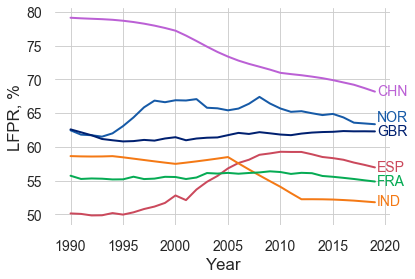

In [105]:
fig,ax = plt.subplots()
for country in countries_pick:
    data = lfpr[lfpr['Country Code']==country]
    ax.plot(data.year,data.LFPR,pal[country],linewidth=2,label=country)
    if (country != 'USA') & (country != 'NOR'):  
        ax.annotate(country,(2019.2,data[data.year==2019].LFPR-.5),color=pal[country])
    elif country == 'USA':
        ax.annotate(country,(2019.2,data[data.year==2019].LFPR-2),color=pal[country])
    elif country == 'NOR':
        ax.annotate(country,(2019.2,data[data.year==2019].LFPR+.5),color=pal[country])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('LFPR, %')
plt.savefig('./lfpr.svg',bbox_inches='tight')

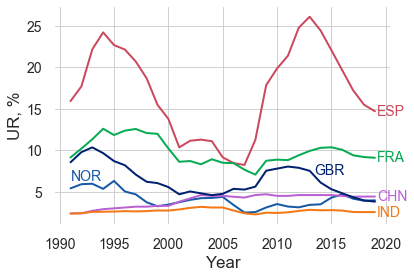

In [106]:
fig,ax = plt.subplots()
for country in countries_pick:
    data = ur[ur['Country Code']==country]
    ax.plot(data.year,data.UR,pal[country],linewidth=2)
    if country == 'GBR':
        ax.annotate(country,(2013.4,data[data.year==2013].UR-.5),color=pal[country])
    elif country == 'NOR':
        ax.annotate(country,(1991,data[data.year==1991].UR+.9),color=pal[country])        
    else:
        ax.annotate(country,(2019.2,data[data.year==2019].UR-.5),color=pal[country])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('UR, %')
plt.savefig('./ur.svg',bbox_inches='tight')

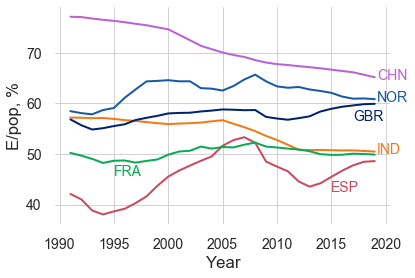

In [107]:
fig,ax = plt.subplots()
for country in countries_pick:
    data = epop[epop['Country Code']==country]
    ax.plot(data.year,data['E/pop'],pal[country],linewidth=2)
    if country == 'GBR':
        ax.annotate(country,(2017,data[data.year==2017]['E/pop']-3),color=pal[country])
    elif country == 'ESP':
        ax.annotate(country,(2015,data[data.year==2015]['E/pop']-3),color=pal[country])   
    elif country == 'FRA':
        ax.annotate(country,(1995,data[data.year==1995]['E/pop']-3),color=pal[country])  
    else:
        ax.annotate(country,(2019.2,data[data.year==2019]['E/pop']-.5),color=pal[country])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('Year')
ax.set_ylabel('E/pop, %')
plt.savefig('./epop.svg',bbox_inches='tight')

In [10]:
lfpr.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [11]:
ur.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [12]:
epop.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [13]:
df = lfpr.merge(ur,on=['Country Name','Country Code','year']).merge(epop,on=['Country Name','Country Code','year'])

In [14]:
df['E/pop']=df['E/pop'].round(decimals=2)

In [15]:
locs = {'CHN':(5,75),
       'NOR':(5,65),
       'GBR':(8,63),
       'IND':(3,55),
       'FRA':(6,53),
       'ESP':(20,55)}

In [18]:
df[df.year==1991]

,Country Name,Country Code,year,LFPR,UR,E/pop
0,Afghanistan,AFG,1991,63.433998,2.976000,61.55
1,Angola,AGO,1991,78.002998,22.601999,60.37
2,Albania,ALB,1991,65.903999,16.781000,54.85
3,Arab World,ARB,1991,48.304310,11.635213,42.68
4,United Arab Emirates,ARE,1991,73.114998,1.632000,71.92
5,Argentina,ARG,1991,59.730999,5.440000,56.48
6,Armenia,ARM,1991,59.109001,1.600000,58.16
7,Australia,AUS,1991,63.269001,9.579000,57.21
8,Austria,AUT,1991,56.169998,3.420000,54.25
9,Azerbaijan,AZE,1991,60.569000,0.900000,60.02


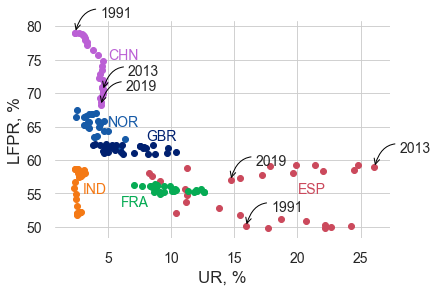

In [33]:
fig, ax = plt.subplots()
for country in countries_pick:
    data = df[df['Country Code']==country]
    ax.scatter(data.UR,data.LFPR,color=pal[country])
    loc_ = locs[country]
    loc_2 = data[data.year == 1991][['UR','LFPR']].values[0]
    ax.annotate(country,loc_,color=pal[country])
    if country in ['CHN','ESP']:
        for year_ in [1991,2013,2019]:
            loc_2 = data[data.year == year_][['UR','LFPR']].values[0]
            ax.annotate(
            year_, xy=loc_2, xycoords="data",
            xytext=(25, 15), textcoords="offset points",
            arrowprops=dict(arrowstyle="->", color='k',connectionstyle="arc3,rad=0.6"))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel('UR, %')
ax.set_ylabel('LFPR, %')
plt.savefig('./lfpr_ur.svg',bbox_inches='tight')

In [134]:
import plotly_express as px
import plotly as py
py.offline.init_notebook_mode(connected=True)

In [135]:
df.head()

,Country Name,Country Code,year,LFPR,UR,E/pop
0,Afghanistan,AFG,1991,63.433998,2.976000,61.546001
1,Angola,AGO,1991,78.002998,22.601999,60.372002
2,Albania,ALB,1991,65.903999,16.781000,54.845001
3,Arab World,ARB,1991,48.304310,11.635213,42.683929
4,United Arab Emirates,ARE,1991,73.114998,1.632000,71.921997


In [169]:
fig = px.scatter(df[df['Country Code'].isin(countries_pick)],x='UR',y='LFPR',color='Country Code',
           color_discrete_map=pal,template='plotly_white',size='E/pop',size_max=12,
           hover_name='Country Name',hover_data=['year','E/pop'],height=500)

In [170]:
fig.for_each_trace(
    lambda trace: trace.update(name=trace.name.replace("Country Code=", "")))

In [171]:
py.offline.plot(fig, filename='lfpr_ur.html')

'lfpr_ur.html'